# Exploring Data Analyst Job Postings

* Brendan Reed
* 10/02/2023
* github: https://github.com/reedbc1
* csv source: https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs

## Objective:

Explore commonalities between different data analyst job postings online.

Importing packages

In [256]:
import numpy as np
import pandas as pd

Loading the file into a DataFrame:

In [257]:
df = pd.read_csv('DataAnalyst.csv', index_col=0)

## Processing data

Data preview:

In [258]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


Dropping missing values from DataFrame (missing values are marked by "-1")

In [259]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

Dropping columns that will not be used in my analysis

In [260]:
df.drop(['Job Description', 'Rating', 'Company Name', 'Headquarters', 'Founded', 'Type of ownership', 'Industry', 'Revenue', 'Competitors', 'Easy Apply'], axis = 1)

,Job Title,Salary Estimate,Location,Size,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),"New York, NY",201 to 500 employees,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),"New York, NY",10000+ employees,Health Care
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),"New York, NY",1001 to 5000 employees,Information Technology
3,Data Analyst,$37K-$66K (Glassdoor est.),"New York, NY",201 to 500 employees,Information Technology
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),"New York, NY",501 to 1000 employees,"Arts, Entertainment & Recreation"
...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),"Denver, CO",51 to 200 employees,Business Services
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),"Centennial, CO",10000+ employees,Business Services
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Denver, CO",-1,-1
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),"Centennial, CO",201 to 500 employees,Information Technology


In [261]:
df = df[df != "-1"].dropna()

Creating a new column that is the average of the estimated salary range given by Glassdoor

In [262]:
import re
import statistics

# getting numbers from string
def get_avg_sal(my_string):
    temp = re.findall(r'\d+', my_string)
    res = list(map(int, temp))
    try:
      return (res[0] + res[1]) / 2
    except:
       return '-1'

Drop missing values:

In [263]:
df = df[df != "-1"].dropna()

In [264]:
df['Avg Est Salary'] = df['Salary Estimate'].map(get_avg_sal)

Splitting job location into two columns (city and state) to make analysis easier

In [265]:
def get_city_loc(my_string):
    split_string = my_string.split(", ")
    if split_string == ['Greenwood Village', 'Arapahoe', 'CO']:
        split_string.pop(0)
    city, state = split_string
    return city
    

def get_state_loc(my_string):
    split_string = my_string.split(", ")
    if split_string == ['Greenwood Village', 'Arapahoe', 'CO']:
        split_string.pop(0)
    city, state = split_string
    return state

In [266]:
df['Location_city'] = df['Location'].map(get_city_loc)
df['Location_state'] = df['Location'].map(get_state_loc)

Dropping columns that the above processed columns are replacing

In [267]:
df = df.drop(['Salary Estimate','Location'], axis=1)

Preview of new DataFrame:

In [268]:
df.head()

,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Avg Est Salary,Location_city,Location_state
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,51.5,New York,NY
7,Data Science Analyst,Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies\n3.7,"New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,51.5,New York,NY
16,Data Analyst,Undertone stands alone among AdTech and ad net...,3.8,Undertone\n3.8,"New York, NY",201 to 500 employees,2001,Subsidiary or Business Segment,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"DoubleClick, Specific Media, Collective",True,51.5,New York,NY
47,Data Analyst,MediaMath is a leading global independent adve...,3.6,MediaMath\n3.6,"New York, NY",501 to 1000 employees,2007,Company - Private,Advertising & Marketing,Business Services,$100 to $500 million (USD),"Criteo, AppNexus, dataxu",True,66.5,New York,NY
82,"Healthcare Data Analyst, Qsight",Guidepoint's Qsight team turns rows of data in...,3.3,Guidepoint\n3.3,"New York, NY",501 to 1000 employees,2003,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Coleman Research, AlphaSights, Third Bridge",True,69.5,New York,NY


In [269]:
df.tail()

,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Avg Est Salary,Location_city,Location_state
1898,"Senior Analyst, Data & Analytics",PubNub powers apps that bring people together ...,4.1,PubNub\n4.1,"San Francisco, CA",51 to 200 employees,2011,Company - Private,Internet,Information Technology,$10 to $25 million (USD),"Pusher, Firebase",True,80.5,San Francisco,CA
2019,Alerts Business/Data Analyst,Job Description\n\n\nJob #: 1073316\n\nLocatio...,3.8,Apex Systems\n3.8,"Glen Allen, VA",1001 to 5000 employees,1995,Subsidiary or Business Segment,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"TEKsystems, Insight Global, Accenture",True,92.5,San Francisco,CA
2178,BI/Data Analyst,Job Description\n\n\nJob #: 1067357\n\nApex Sy...,3.8,Apex Systems\n3.8,"Glen Allen, VA",1001 to 5000 employees,1995,Subsidiary or Business Segment,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"TEKsystems, Insight Global, Accenture",True,62.0,Arapahoe,CO
2183,Senior Data Quality Analyst,Ibotta is seeking a Senior Data Quality Analys...,3.5,Ibotta\n3.5,"Denver, CO",501 to 1000 employees,2012,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Checkout 51, RetailMeNot, shopkick",True,70.0,Denver,CO
2229,Application Data Analyst,Job Description\n\n\nJob #: 1068993\n\nApex Sy...,3.8,Apex Systems\n3.8,"Glen Allen, VA",1001 to 5000 employees,1995,Subsidiary or Business Segment,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"TEKsystems, Insight Global, Accenture",True,78.5,Arapahoe,CO


In [270]:
df.describe()

,Rating,Founded,Avg Est Salary
count,28.000000,28.000000,28.0000
mean,3.714286,1994.642857,68.8750
std,0.447805,21.344119,15.9911
min,2.700000,1914.000000,40.0000
25%,3.500000,1995.000000,60.6250
50%,3.800000,1996.000000,69.2500
75%,3.800000,2004.500000,78.7500
max,4.800000,2014.000000,113.0000


In [271]:
# need to drop all numerical columns here.
df_categorical = df.drop(['Rating','Founded', 'Avg Est Salary'], axis = 1)

for i in range(0, len(df_categorical.columns)):
    print(f'descriptive statistics for {df_categorical.columns[i]}')
    print(df_categorical.iloc[:, i].describe())
    print('\n')


descriptive statistics for Job Title
count               28
unique              21
top       Data Analyst
freq                 8
Name: Job Title, dtype: object


descriptive statistics for Job Description
count                                                    28
unique                                                   28
top       ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...
freq                                                      1
Name: Job Description, dtype: object


descriptive statistics for Company Name
count                    28
unique                   18
top       Apex Systems\n3.8
freq                     10
Name: Company Name, dtype: object


descriptive statistics for Headquarters
count                 28
unique                12
top       Glen Allen, VA
freq                  10
Name: Headquarters, dtype: object


descriptive statistics for Size
count                         28
unique                         5
top       1001 to 5000 employees
freq                 

In [272]:
for i in range(0, len(df_categorical.columns)):
    print(f'unique values for {df_categorical.columns[i]}')
    print(df_categorical.iloc[:, i].unique())
    print('\n')

unique values for Job Title
['Reporting Data Analyst' 'Data Science Analyst' 'Data Analyst'
 'Healthcare Data Analyst, Qsight' 'Product Analyst - Data'
 'Data Operations Analyst'
 'Data Analyst (Supply Chain) - May Reside Anywhere in the US - Up to 100% Travel'
 'Business Data Analyst' 'Business Analyst/Data Consultant'
 'Data Analyst - Sr' 'Senior Data Analyst' 'Data Analyst II'
 'Senior Data Analyst (Product Analytics)'
 'Signal Processing Engineer/Data Analyst'
 'Strategic Sourcing Data Analyst' 'HR Data Analyst'
 'Senior Analyst, Data & Analytics' 'Alerts Business/Data Analyst'
 'BI/Data Analyst' 'Senior Data Quality Analyst'
 'Application Data Analyst']


unique values for Job Description
["ABOUT FANDUEL GROUP\n\nFanDuel Group is a world-class team of brands and products all built with one goal in mind — to give fans new and innovative ways to interact with their favorite games, sports, teams, and leagues. That's no easy task, which is why we're so dedicated to building a winning 

array([[<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Founded'}>],
       [<Axes: title={'center': 'Avg Est Salary'}>, <Axes: >]],
      dtype=object)

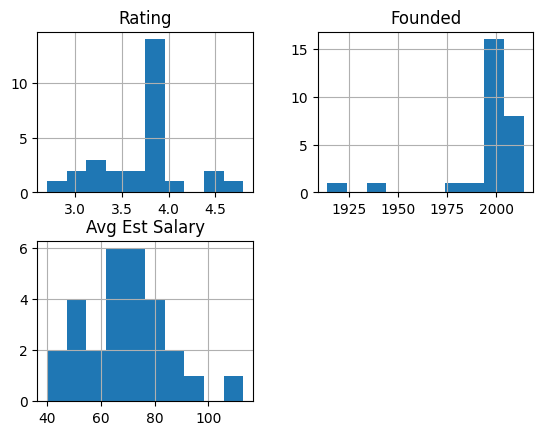

In [273]:
df.hist()

After processing some columns, we can run analysis easier.

## Showing average data analyst salary for each state based on the data

In [274]:
df[['Location_state', 'Avg Est Salary']].groupby('Location_state').mean().sort_values('Avg Est Salary', ascending = False)

,Avg Est Salary
Location_state,
CA,81.062500
IL,79.625000
NJ,70.500000
CO,70.166667
NC,64.500000
NY,58.100000
PA,56.250000
TX,51.250000
OH,40.000000


Showing number of data points for each state:

In [279]:
df.groupby('Location_state')['Location_state'].count()

Location_state
CA    8
CO    3
IL    4
NC    1
NJ    2
NY    5
OH    1
PA    2
TX    2
Name: Location_state, dtype: int64

California and Illinois seem to pay data Analysts the most. Some states do not have many data points, so it is difficult to generalize for these states.

## Showing average estimated salary by size of company:

In [275]:
df[['Size', 'Avg Est Salary']].groupby('Size').mean().sort_values('Avg Est Salary', ascending = False)

,Avg Est Salary
Size,
51 to 200 employees,84.000000
10000+ employees,72.000000
1001 to 5000 employees,70.208333
501 to 1000 employees,62.857143
201 to 500 employees,59.500000


Showing number of data points for each size value:

In [276]:
df.groupby('Size')['Size'].count()

Size
10000+ employees           1
1001 to 5000 employees    12
201 to 500 employees       4
501 to 1000 employees      7
51 to 200 employees        4
Name: Size, dtype: int64

Conclusions: It seems like relatively small companies (with 51 to 200 employees). Aside from that category, larger companies are more likely to pay more. Perhaps this could be explained by roles within smaller companies being more demanding, which could be why companies with 51 - 200 employees pay more. Otherwise, perhaps larger companies can afford to pay employees more.

## Showing average estimated salary in each business sector:

In [277]:
df[['Sector', 'Avg Est Salary']].groupby('Sector').mean().sort_values('Avg Est Salary', ascending = False)

,Avg Est Salary
Sector,
Biotech & Pharmaceuticals,89.50000
Media,80.50000
Education,72.00000
Retail,72.00000
Information Technology,70.75000
Business Services,68.34375
Health Care,63.00000
"Arts, Entertainment & Recreation",61.75000
Insurance,51.50000


Showing number of data points for each sector:

In [278]:
df.groupby('Sector')['Sector'].count()

Sector
Arts, Entertainment & Recreation     2
Biotech & Pharmaceuticals            1
Business Services                   16
Education                            1
Health Care                          1
Information Technology               4
Insurance                            1
Media                                1
Retail                               1
Name: Sector, dtype: int64

Conclusions: This is difficult to draw any generalized conclusions from because for many sectors there is only one observation.